# Bernstein-Vazirani-Algorithmus mit variabler Eingabe

[Link](https://www.bing.com/videos/search?q=qiskit+abraham+asfaw+Bernstein+Vazirani&&view=detail&mid=E4B91E29244AE45DF39AE4B91E29244AE45DF39A&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dqiskit%2520abraham%2520asfaw%2520Bernstein%2520Vazirani%26qs%3Dn%26form%3DQBVDMH%26%3D%2525eIhren%2520Suchverlauf%2520verwalten%2525E%26sp%3D-1%26lq%3D0%26pq%3Dqiskit%2520abraham%2520asfaw%2520bernstein%2520vazirani%26sc%3D0-39%26sk%3D%26cvid%3D0B852B9E191D46ECA690B5EBE27BBD58%26ghsh%3D0%26ghacc%3D0%26ghpl%3D)

[Beispiel mit vorgegebener Zahl](#fest)

[Beispiel mit variabler Eingabe](#vari)


## Variable Eingabe <a name="vari"></a>

In [1]:
from qiskit import QuantumCircuit, execute, BasicAer
%matplotlib inline
from qiskit.tools.visualization import plot_histogram


In [2]:
geheimzahl = input("Geben Sie eine binäre Geheimzahl ein") 

Geben Sie eine binäre Geheimzahl ein 10001110001


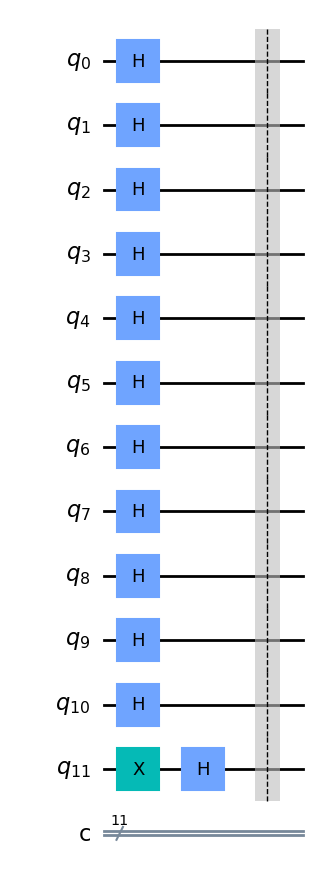

In [6]:
vqc = QuantumCircuit(len(geheimzahl)+1,len(geheimzahl))

vqc.h(range(len(geheimzahl)))
vqc.x(len(geheimzahl))
vqc.h(len(geheimzahl))

vqc.barrier()

vqc.draw("mpl")

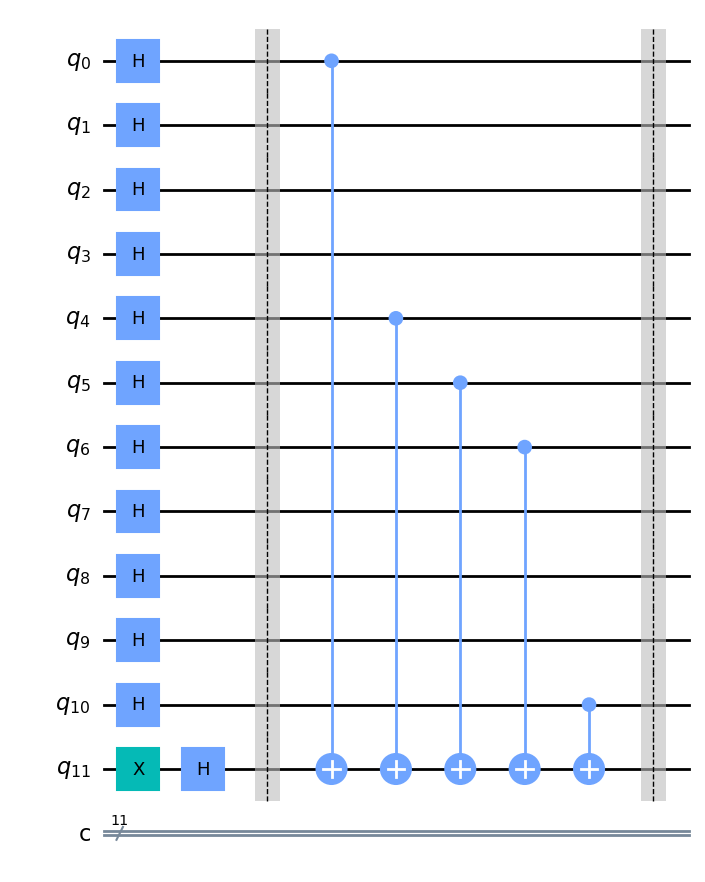

In [7]:
for i, test in enumerate(reversed(geheimzahl)):
    if test == "1":
        vqc.cx(i, len(geheimzahl))
              
vqc.barrier()

vqc.draw("mpl")

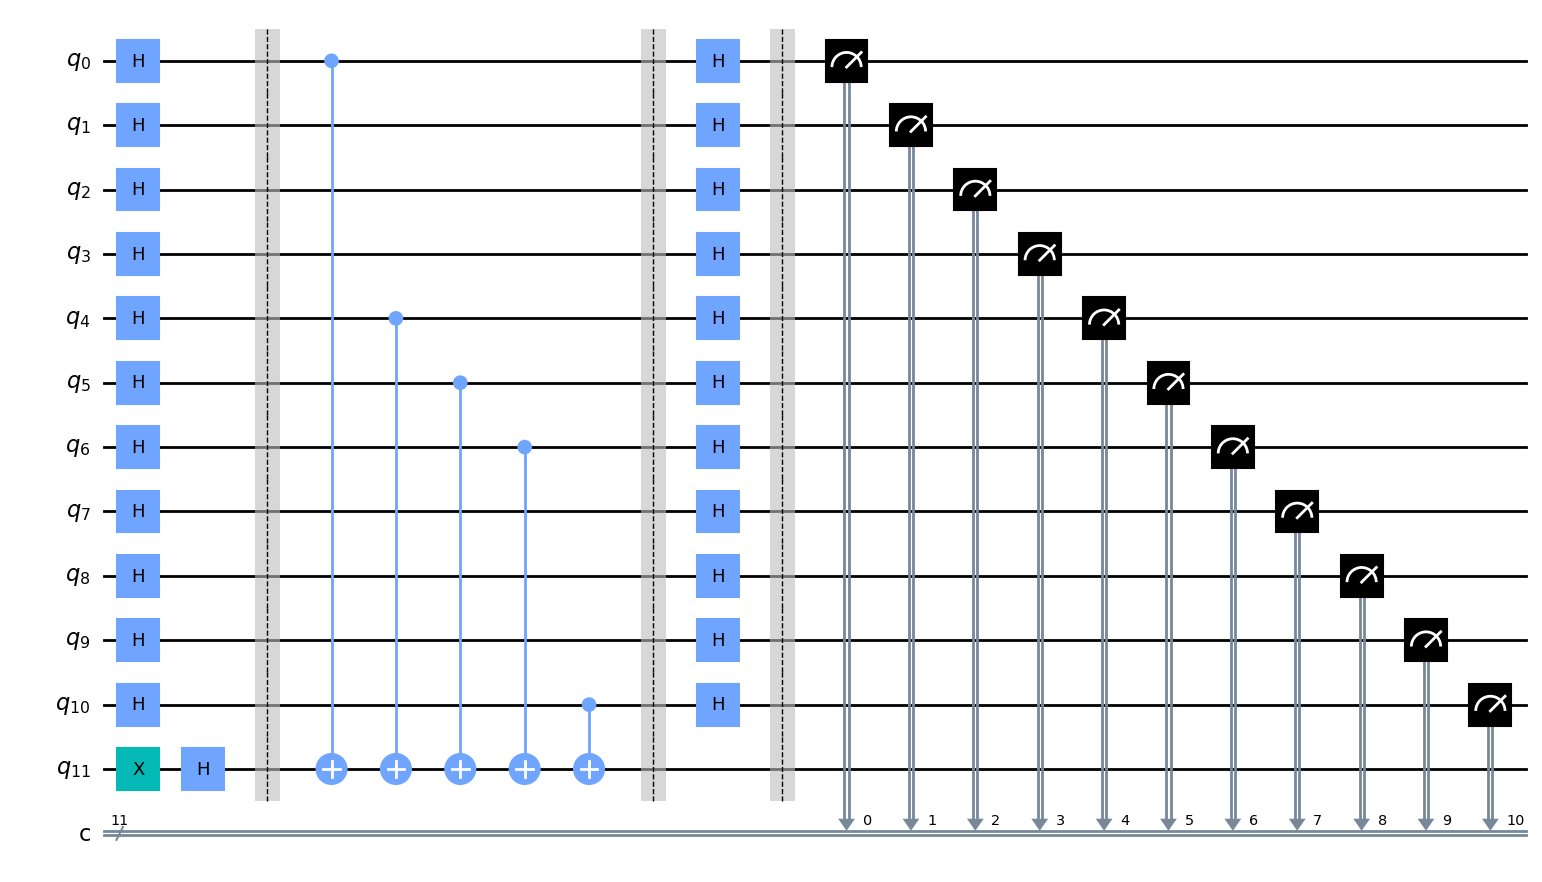

In [8]:
vqc.h(range(len(geheimzahl)))

vqc.barrier()

vqc.measure(range(len(geheimzahl)),range(len(geheimzahl)))

vqc.draw("mpl")

In [9]:
simulator = BasicAer.get_backend('qasm_simulator')
result = execute(vqc, backend = simulator, shots = 100).result()
counts = result.get_counts()
print(counts)

{'10001110001': 100}


In [10]:
print(geheimzahl)

10001110001
